Step 1: Load the Dataset


In [91]:
import pandas as pd

# Load the dataset
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

Step 2: Handle Missing Values (Imputation)


In [92]:
from sklearn.impute import SimpleImputer

# Identifying features where zero values are unrealistic (possible missing values)
zero_replacement_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replacing zeros with the median value of each column
imputer = SimpleImputer(missing_values=0, strategy="median")
df[zero_replacement_features] = imputer.fit_transform(df[zero_replacement_features])

# Checking if any zero values remain in these columns
zero_counts = (df[zero_replacement_features] == 0).sum()

zero_counts


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


# Step 3: Standardization/Normalization


In [93]:
from sklearn.preprocessing import StandardScaler

# Normalize all numerical features except the target variable
scaler = StandardScaler()
scaled_features = df.drop(columns=["Outcome"]).copy()
df_scaled = pd.DataFrame(scaler.fit_transform(scaled_features), columns=scaled_features.columns)
df_scaled["Outcome"] = df["Outcome"]

# Display first few rows after standardization
df_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


Step 4: Handling Outliers


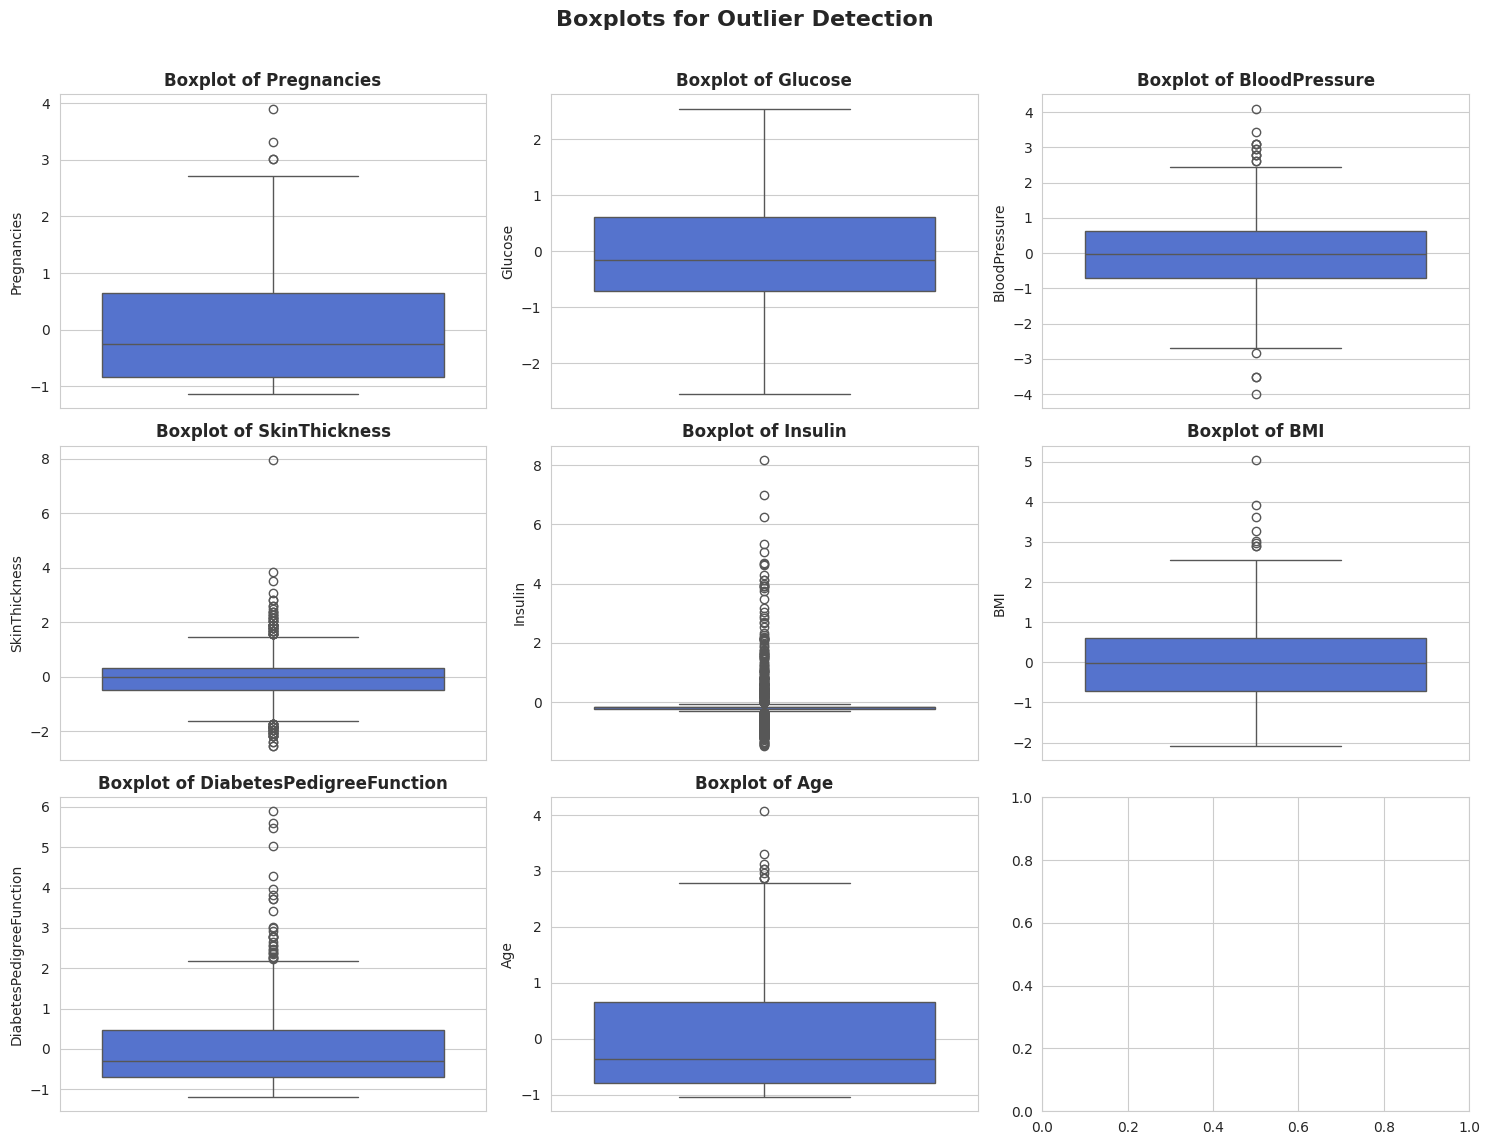

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Boxplots for detecting outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16, fontweight='bold')

for i, col in enumerate(df_scaled.columns[:-1]):  # Exclude Outcome
    sns.boxplot(data=df_scaled, y=col, ax=axes[i // 3, i % 3], color="royalblue")
    axes[i // 3, i % 3].set_title(f"Boxplot of {col}", fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


Code for Removing Outliers:

In [95]:
# Outlier handling using IQR method
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df_no_outliers = df_scaled[~((df_scaled < lower_bound) | (df_scaled > upper_bound)).any(axis=1)]

# Display first few rows after removing outliers
df_no_outliers.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
5,0.342981,-0.185948,0.133453,-0.012301,-0.181541,-0.997745,-0.818079,-0.275760,0
7,1.827813,-0.218823,-0.031990,-0.012301,-0.181541,0.414047,-1.020427,-0.360847,0


Step 5: Class Balance Check

<ipython-input-96-8d30f8543931>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])


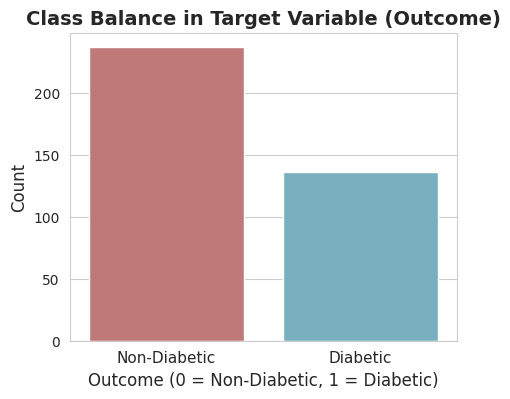

In [96]:
# Visualizing class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])
plt.title("Class Balance in Target Variable (Outcome)", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"], fontsize=11)
plt.show()


Step 1: Splitting the Dataset


In [97]:
# Step 1: Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_no_outliers.drop(columns=["Outcome"])
y = df_no_outliers["Outcome"]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((298, 8), (75, 8), (298,), (75,))

# **Logistic Regression model**

## About the dataset
The Pima Indian diabetes dataset was performed on 768 female patients of at least 21years old. These females were all of the Pima Indian heritage. 268 of these women tested positive while 500 tested negative. In the dataset, each instance has 8 attributes and the are all numeric. The attributes include:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

### Over-sampling using SMOTE
You can notice that out data is not balanced.
Using the SMOTE algorithm(Synthetic Minority Oversampling Technique) we can up-sample the positive outcome.

Works by creating synthetic samples from the smaller class (positive) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [98]:
!pip install imblearn

In [99]:
# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE

# Ensuring consistency in data length by filtering out zero BMI values
filtered_data = df_no_outliers[df_no_outliers["BMI"] != 0]
X = filtered_data.drop(columns=["Outcome"])
y = filtered_data["Outcome"]

# Apply SMOTE for oversampling
print("\nApplying SMOTE for balancing the dataset...")
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert oversampled data back to DataFrame
X_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
y_resampled = pd.DataFrame(data=y_resampled, columns=["Outcome"])

# Print dataset details
print("Length of oversampled data:", len(X_resampled))
print("Number of negatively tested in oversampled data:", len(y_resampled[y_resampled["Outcome"] == 0]))
print("Number of positively tested in oversampled data:", len(y_resampled[y_resampled["Outcome"] == 1]))
print("Proportion of negatively tested:", len(y_resampled[y_resampled["Outcome"] == 0]) / len(X_resampled))
print("Proportion of positively tested:", len(y_resampled[y_resampled["Outcome"] == 1]) / len(X_resampled))

# Split the oversampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)





Applying SMOTE for balancing the dataset...
Length of oversampled data: 474
Number of negatively tested in oversampled data: 237
Number of positively tested in oversampled data: 237
Proportion of negatively tested: 0.5
Proportion of positively tested: 0.5


### Data Exploration of Some Attributes

<ipython-input-100-d157dfb1d041>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(filtered_data["Age"][filtered_data["Outcome"] == 1], color="darkturquoise", shade=True)
<ipython-input-100-d157dfb1d041>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data["Age"][filtered_data["Outcome"] == 0], color="lightcoral", shade=True)


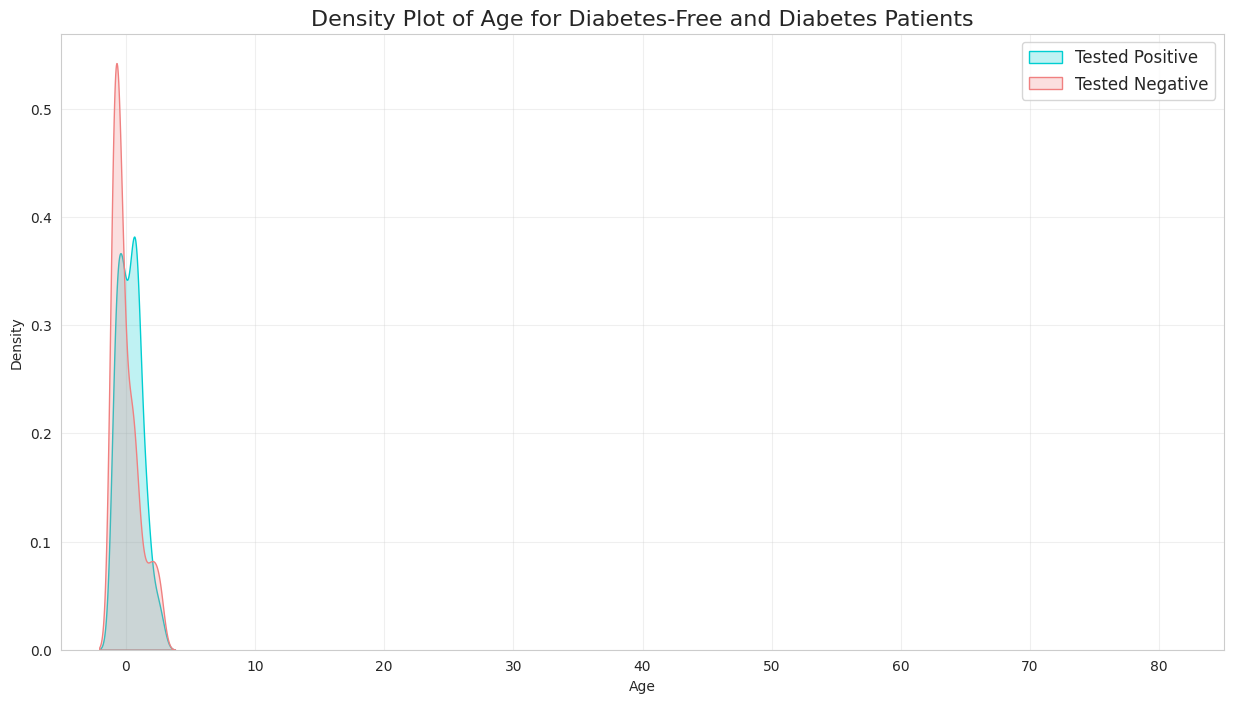

In [100]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(filtered_data["Age"][filtered_data["Outcome"] == 1], color="darkturquoise", shade=True)
sns.kdeplot(filtered_data["Age"][filtered_data["Outcome"] == 0], color="lightcoral", shade=True)
plt.legend(["Tested Positive", "Tested Negative"], fontsize=12)
plt.title("Density Plot of Age for Diabetes-Free and Diabetes Patients", fontsize=16)
ax.set(xlabel="Age", ylabel="Density")
plt.xlim(-5, 85)
plt.grid(alpha=0.3)
plt.show()

We can see here that most women who tested positive were between the age of 25 and 50 and most who were negative were below 25

### Feature Selection
We are going to use Recursive Feature elimination to select features. It selects features by recursively considering smaller and smaller sets of features.  It works like gradient descent where the estimator is trained on initial sets of features an the coef_attribute of each feature is obtained. This coef tells us how important each attribute is. The least important features are pruned from th current set of features. This procdure is repeated until the desired number of features is selected.

We also use K-Fold Cross Validation on our data to prevent overfitting and improve confidence of features selected


Optimal number of features: 8
Selected features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


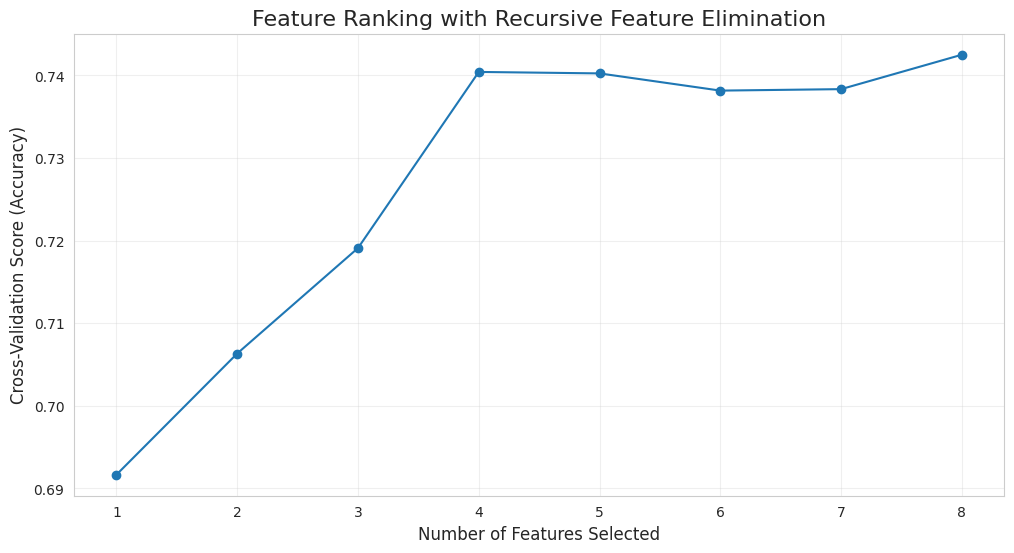

In [101]:
### Feature Selection using Recursive Feature Elimination (RFECV)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize Logistic Regression model
logistic_regression = LogisticRegression(solver="lbfgs", max_iter=1000)

# Create the RFECV model
rfecv = RFECV(
    estimator=logistic_regression,
    step=1,
    cv=kfold,
    scoring="accuracy",
    n_jobs=-1  # Utilize all available processors
)

# Fit the RFECV model on the oversampled dataset
rfecv.fit(X_resampled, y_resampled.values.ravel())

# Summarize feature selection
selected_features = list(X_resampled.columns[rfecv.support_])
print("\nOptimal number of features:", rfecv.n_features_)
print("Selected features:", selected_features)

# Visualize feature ranking
plt.figure(figsize=(12, 6))
plt.title("Feature Ranking with Recursive Feature Elimination", fontsize=16)
plt.xlabel("Number of Features Selected", fontsize=12)
plt.ylabel("Cross-Validation Score (Accuracy)", fontsize=12)
plt.plot(
    range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    rfecv.cv_results_["mean_test_score"],
    marker="o",
)
plt.grid(alpha=0.3)
plt.show()


### Correlation Matrix
A matrix of correlations provides useful insight into relationships between pairs of variables.

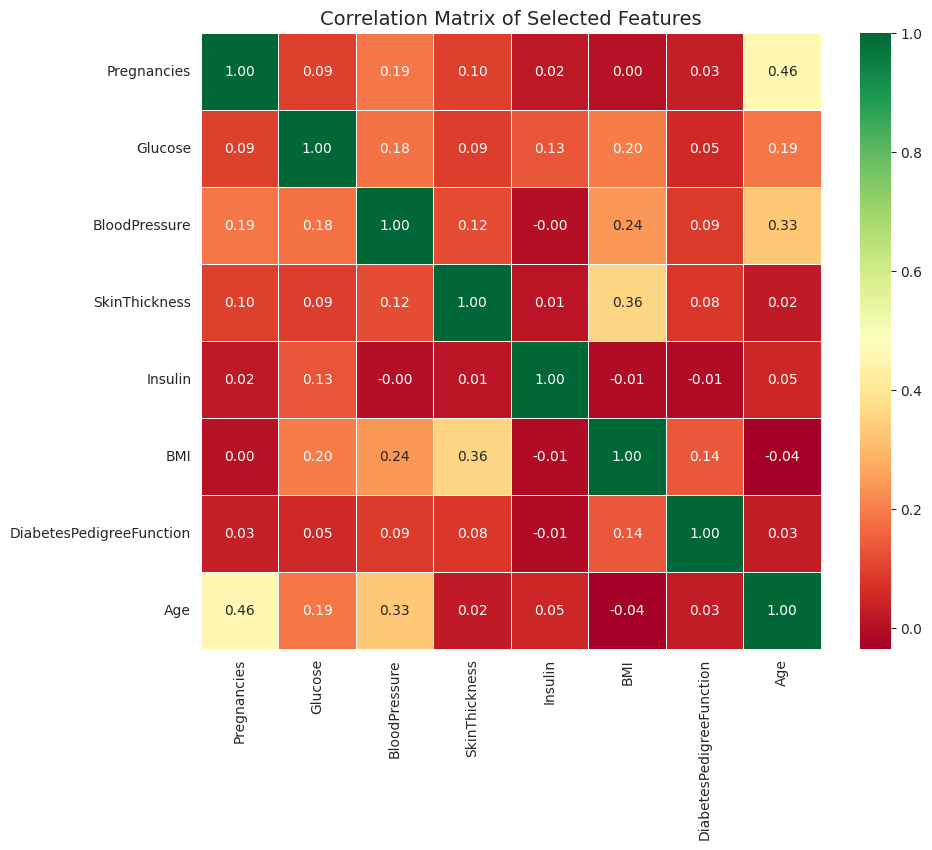

In [102]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=X_resampled[selected_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=0.5,
)
plt.title("Correlation Matrix of Selected Features", fontsize=14)
plt.show()

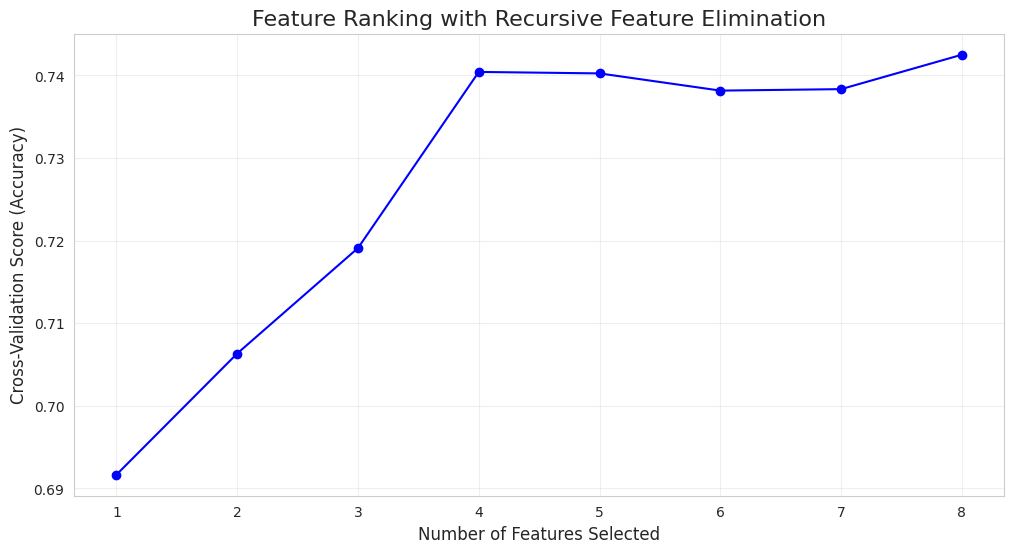

In [103]:
# Visualization of feature ranking
plt.figure(figsize=(12, 6))
plt.title("Feature Ranking with Recursive Feature Elimination", fontsize=16)
plt.xlabel("Number of Features Selected", fontsize=12)
plt.ylabel("Cross-Validation Score (Accuracy)", fontsize=12)
plt.plot(
    range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    rfecv.cv_results_["mean_test_score"],
    marker="o",
    color="blue",
)
plt.grid(alpha=0.3)
plt.show()

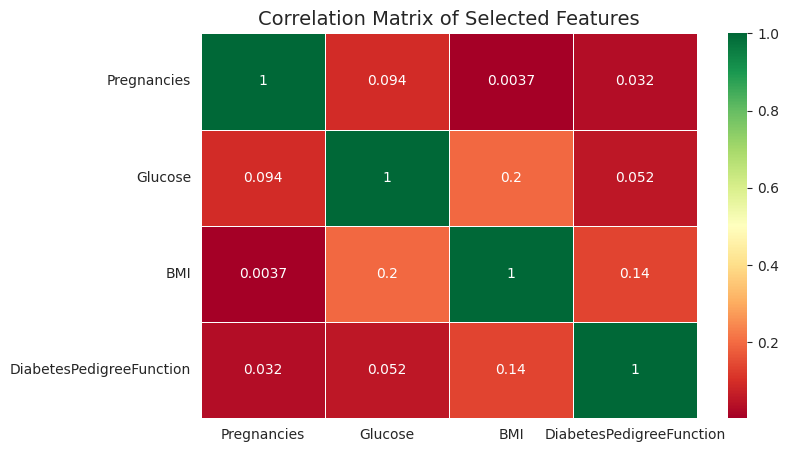

In [104]:
selected_features_manual = ["Pregnancies", "Glucose", "BMI", "DiabetesPedigreeFunction"]
X_selected = X_resampled[selected_features_manual]

plt.figure(figsize=(8, 5))
sns.heatmap(X_selected.corr(), annot=True, cmap="RdYlGn", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features", fontsize=14)
plt.show()

**Training the Logistic Regression Model**

In [105]:
# Step 2: Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate performance
logistic_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
}

# Display results
logistic_results


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Accuracy': 0.8105263157894737,
 'Precision': 0.8222222222222222,
 'Recall': 0.7872340425531915,
 'F1 Score': 0.8043478260869565}

**Confusion Matrix**

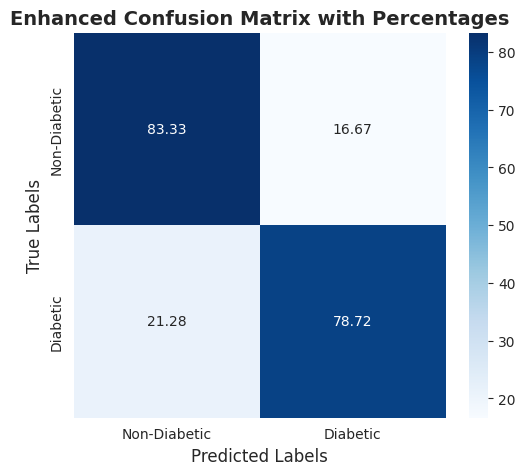

In [106]:
# Step 3: Confusion Matrix Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Enhanced Confusion Matrix with Percentages", fontsize=14, fontweight="bold")
plt.show()


Feature Importance

<ipython-input-107-817b3e245e60>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")


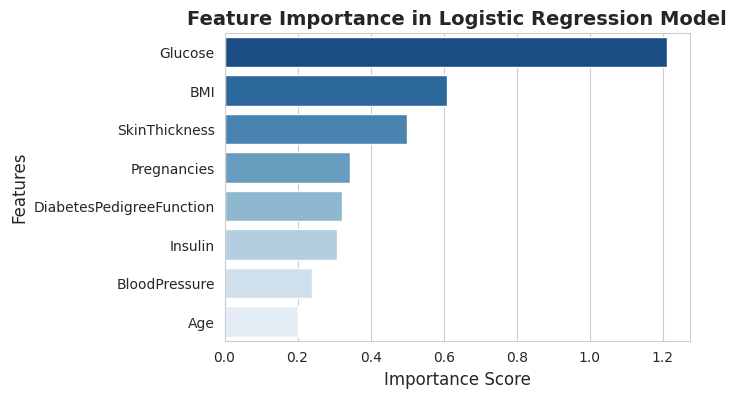

In [107]:
# Step 4: Feature Importance Visualization for Logistic Regression
feature_importance = abs(logistic_model.coef_[0])  # Absolute values of coefficients
feature_names = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Logistic Regression Model", fontsize=14, fontweight="bold")
plt.show()


Class Balance In Target Variable

<ipython-input-108-2fe381733a56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])


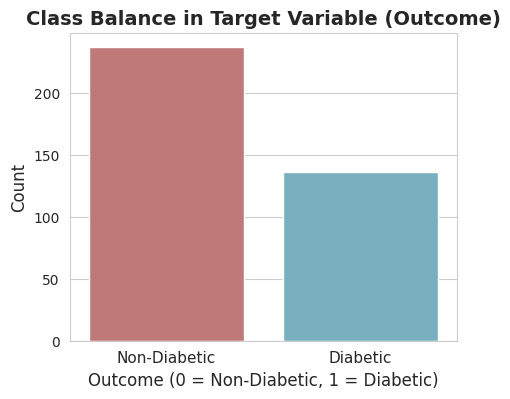

In [108]:
# Step 5: Target Variable Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])

plt.title("Class Balance in Target Variable (Outcome)", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"], fontsize=11)
plt.show()


# Decision Tree Model

In [109]:
# Step 1: Train the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate performance
decision_tree_results = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1 Score": f1_score(y_test, y_pred_dt),
}

# Display results
decision_tree_results


{'Accuracy': 0.7052631578947368,
 'Precision': 0.7021276595744681,
 'Recall': 0.7021276595744681,
 'F1 Score': 0.7021276595744681}

Enhanced Confusion Matrix

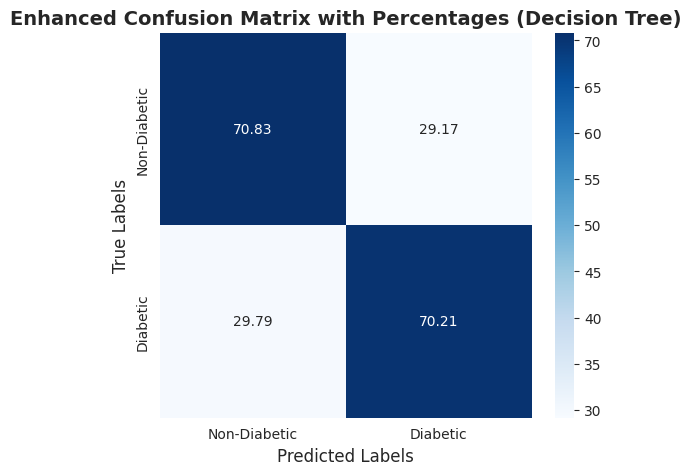

In [110]:
# Step 2: Confusion Matrix Visualization for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt_percentage = cm_dt.astype("float") / cm_dt.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Enhanced Confusion Matrix with Percentages (Decision Tree)", fontsize=14, fontweight="bold")
plt.show()


Feature Importance

<ipython-input-111-fc1d50eef061>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df_dt, palette="Blues_r")


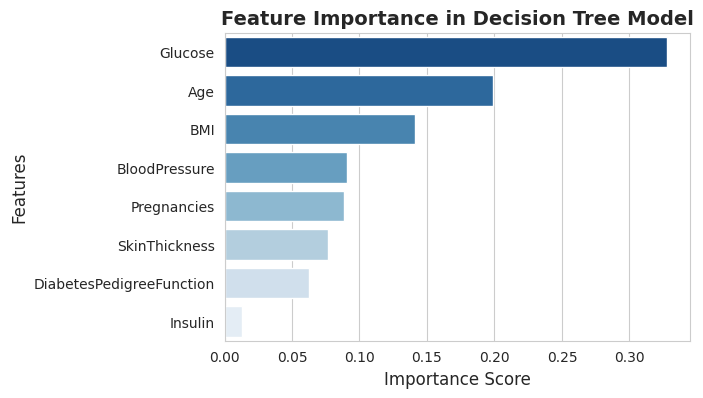

In [111]:
# Step 3: Feature Importance Visualization for Decision Tree
feature_importance_dt = decision_tree_model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importance_df_dt = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_dt})
importance_df_dt = importance_df_dt.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df_dt, palette="Blues_r")

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Decision Tree Model", fontsize=14, fontweight="bold")
plt.show()


Class Balance In Target Variable

<ipython-input-112-5e85bdcb4f00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])


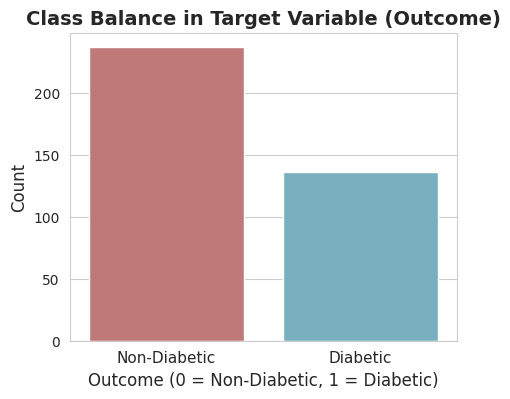

In [112]:
# Step 4: Target Variable Distribution for Decision Tree Model
plt.figure(figsize=(5, 4))
sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])

plt.title("Class Balance in Target Variable (Outcome)", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"], fontsize=11)
plt.show()


Random Forest

In [113]:
# Step 1: Train the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate performance
random_forest_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
}

# Display results
random_forest_results


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'Accuracy': 0.8315789473684211,
 'Precision': 0.803921568627451,
 'Recall': 0.8723404255319149,
 'F1 Score': 0.8367346938775511}

Confusion Matrix

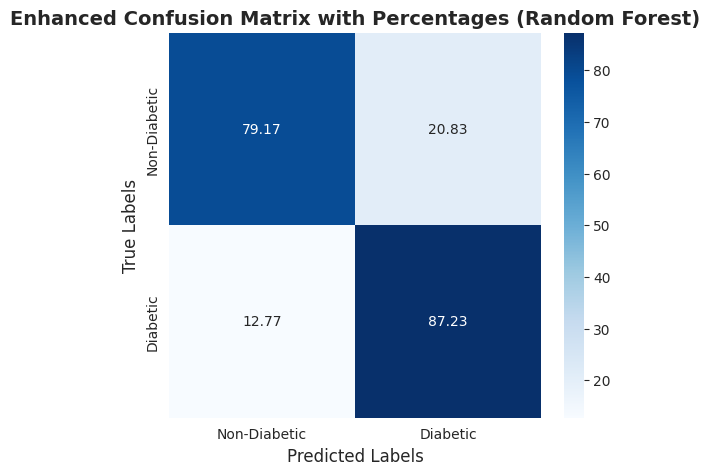

In [114]:
# Step 2: Confusion Matrix Visualization for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_percentage = cm_rf.astype("float") / cm_rf.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Enhanced Confusion Matrix with Percentages (Random Forest)", fontsize=14, fontweight="bold")
plt.show()


Feature Importance

<ipython-input-115-5c87a6712d51>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df_rf, palette="Blues_r")


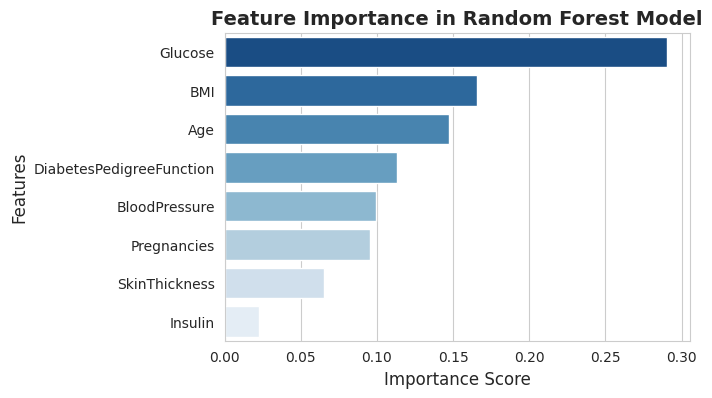

In [115]:
# Step 3: Feature Importance Visualization for Random Forest
feature_importance_rf = random_forest_model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importance_df_rf = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_rf})
importance_df_rf = importance_df_rf.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df_rf, palette="Blues_r")

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Random Forest Model", fontsize=14, fontweight="bold")
plt.show()


Class Balance In Target Variable

<ipython-input-116-7903ff037541>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])


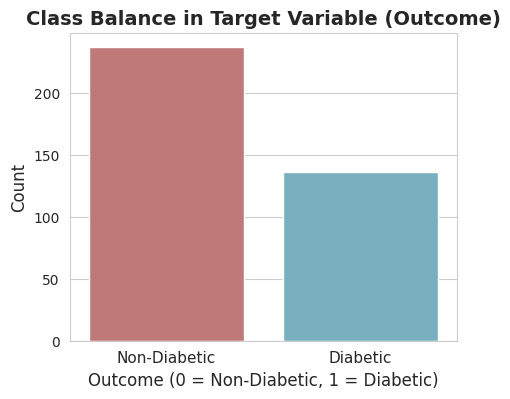

In [116]:
# Step 4: Target Variable Distribution for Random Forest Model
plt.figure(figsize=(5, 4))
sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])

plt.title("Class Balance in Target Variable (Outcome)", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"], fontsize=11)
plt.show()


Stochastic Gradient Descent (SGD)

In [117]:
# Step 1: Train the Stochastic Gradient Descent (SGD) Model
from sklearn.linear_model import SGDClassifier

# Initialize and train the SGD model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions
y_pred_sgd = sgd_model.predict(X_test)

# Evaluate performance
sgd_results = {
    "Accuracy": accuracy_score(y_test, y_pred_sgd),
    "Precision": precision_score(y_test, y_pred_sgd),
    "Recall": recall_score(y_test, y_pred_sgd),
    "F1 Score": f1_score(y_test, y_pred_sgd),
}

# Display results
sgd_results


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Accuracy': 0.5789473684210527,
 'Precision': 0.5660377358490566,
 'Recall': 0.6382978723404256,
 'F1 Score': 0.6}

Confusion Matrix

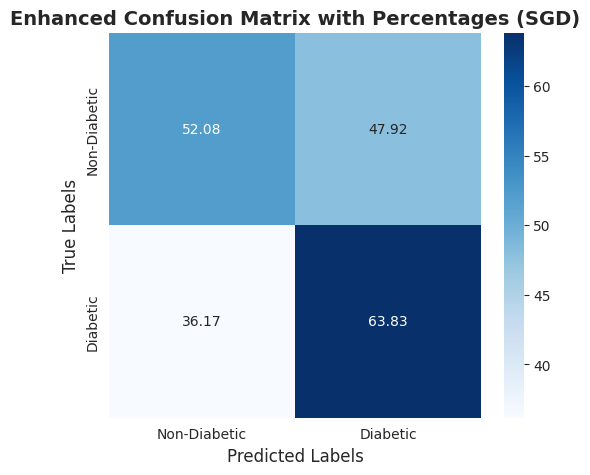

In [118]:
# Step 2: Confusion Matrix Visualization for SGD
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
cm_sgd_percentage = cm_sgd.astype("float") / cm_sgd.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_sgd_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Enhanced Confusion Matrix with Percentages (SGD)", fontsize=14, fontweight="bold")
plt.show()


Feature Importance

<ipython-input-119-fb5a9c3aed7b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df_sgd, palette="Blues_r")


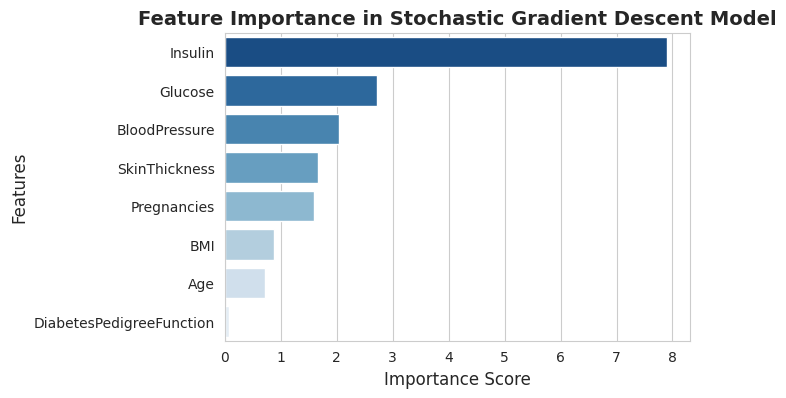

In [119]:
# Step 3: Feature Importance Visualization for SGD (Using Absolute Coefficients)
feature_importance_sgd = abs(sgd_model.coef_[0])  # Absolute values of coefficients
feature_names = X.columns

# Create DataFrame for visualization
importance_df_sgd = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_sgd})
importance_df_sgd = importance_df_sgd.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df_sgd, palette="Blues_r")

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Stochastic Gradient Descent Model", fontsize=14, fontweight="bold")
plt.show()


Class Balance In Target Variable

<ipython-input-120-7311d03f6b44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])


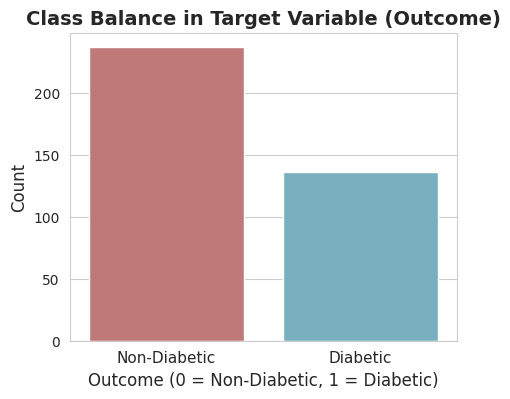

In [120]:
# Step 4: Target Variable Distribution for SGD Model
plt.figure(figsize=(5, 4))
sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])

plt.title("Class Balance in Target Variable (Outcome)", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"], fontsize=11)
plt.show()


Support Vector Machine (SVM)

Support Vector Machines (SVMs) have proven to be a powerful and versatile tool for classification tasks. A key component that significantly enhances the capabilities of SVMs, particularly in dealing with non-linear data, is the Kernel Trick.The kernel trick is a method used in SVMs to enable them to classify non-linear data using a linear classifier. By applying a kernel function, SVMs can implicitly map input data into a higher-dimensional space where a linear separator (hyperplane) can be used to divide the classes. This mapping is computationally efficient because it avoids the direct calculation of the coordinates in this higher space.



In [121]:
# Step 1: Train the Support Vector Machine (SVM) Model
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
svm_results = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1 Score": f1_score(y_test, y_pred_svm),
}

# Display results
svm_results


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Accuracy': 0.8315789473684211,
 'Precision': 0.8163265306122449,
 'Recall': 0.851063829787234,
 'F1 Score': 0.8333333333333334}

Confusion Matrix

Below is the visual interpretation of how well the SVM classifier performed by showing the confusion matrix with percentage values, which helps in understanding the classifier's accuracy, false positives, and false negatives.

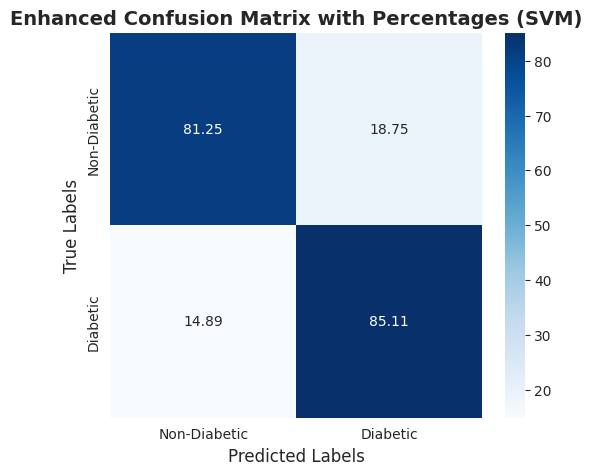

In [33]:
# Step 2: Confusion Matrix Visualization for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm_percentage = cm_svm.astype("float") / cm_svm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Enhanced Confusion Matrix with Percentages (SVM)", fontsize=14, fontweight="bold")
plt.show()


Feature Importance

visualization of the feature importance in the SVM model by showing which features have the most impact on the model's predictions, based on the magnitude of the absolute coefficients. The bar plot helps to quickly identify which features should be prioritized or potentially removed for model improvement.Here glucose and BMI are more important features and age is not that important.

<ipython-input-122-81ffc0d8dee0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df_svm, palette="Blues_r")


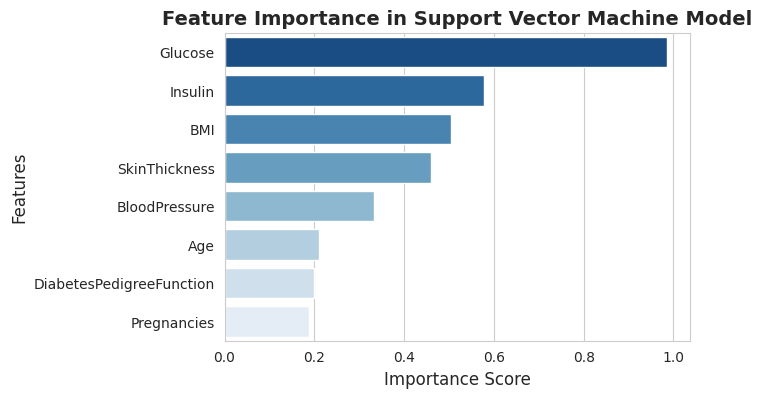

In [122]:
# Step 3: Feature Importance Visualization for SVM (Using Absolute Coefficients)
feature_importance_svm = abs(svm_model.coef_[0])  # Absolute values of coefficients
feature_names = X.columns

# Create DataFrame for visualization
importance_df_svm = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_svm})
importance_df_svm = importance_df_svm.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df_svm, palette="Blues_r")

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Support Vector Machine Model", fontsize=14, fontweight="bold")
plt.show()


Class Balance In Target Variable

<ipython-input-123-73da1095df25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])


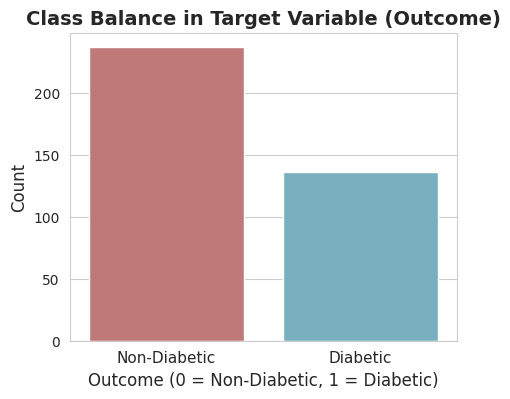

In [123]:
# Step 4: Target Variable Distribution for SVM Model
plt.figure(figsize=(5, 4))
sns.countplot(x=df_no_outliers["Outcome"], palette=["#cb6d6d", "#6db6cb"])

plt.title("Class Balance in Target Variable (Outcome)", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"], fontsize=11)
plt.show()


# GridSearchCV Tuning

For each model, GridSearchCV is used to tune hyperparameters by specifying a range of values for key parameters, such as regularization strength for Logistic Regression, the number of estimators for Random Forest, and the depth of the tree for Decision Trees. 5-fold cross-validation is performed to evaluate the performance of each hyperparameter combination, aiming to identify the best settings that maximized accuracy while minimizing overfitting. This process helped optimize each model for improved generalization on unseen data.

> Add blockquote



In [124]:
# Step 1: Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grid_lr = {"C": [0.01, 0.1, 1, 10, 100]}
param_grid_dt = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
param_grid_rf = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10, None]}
param_grid_sgd = {"alpha": [0.0001, 0.001, 0.01, 0.1], "max_iter": [1000, 5000, 10000]}
param_grid_svm = {"C": [0.01, 0.1, 1, 10, 100], "kernel": ["linear", "rbf"]}

# Initialize models
models = {
    "Logistic Regression": (LogisticRegression(random_state=42), param_grid_lr),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), param_grid_dt),
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "SGD": (SGDClassifier(random_state=42), param_grid_sgd),
    "SVM": (SVC(random_state=42), param_grid_svm),
}

# Perform GridSearchCV tuning for each model
best_models = {}
tuned_results = {}

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    # Evaluate the tuned model
    y_pred_tuned = best_models[name].predict(X_test)
    tuned_results[name] = {
        "Best Parameters": grid_search.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred_tuned),
        "Precision": precision_score(y_test, y_pred_tuned),
        "Recall": recall_score(y_test, y_pred_tuned),
        "F1 Score": f1_score(y_test, y_pred_tuned),
    }

# Display results of tuning
import pandas as pd
tuned_results_df = pd.DataFrame(tuned_results).T
tuned_results_df


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

,Best Parameters,Accuracy,Precision,Recall,F1 Score
Logistic Regression,{'C': 100},0.810526,0.822222,0.787234,0.804348
Decision Tree,"{'max_depth': None, 'min_samples_split': 10}",0.694737,0.6875,0.702128,0.694737
Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.810526,0.773585,0.87234,0.82
SGD,"{'alpha': 0.001, 'max_iter': 1000}",0.757895,0.76087,0.744681,0.752688
SVM,"{'C': 10, 'kernel': 'rbf'}",0.768421,0.719298,0.87234,0.788462


## Post GridSearchCV Tuning Comparison Summary

**Post GridSearchCV Tuning Comparison Summary**

After tuning with GridSearchCV, the models displayed varying effects on their F1 scores, which is the most relevant metric due to the dataset’s imbalance.


*   **Logistic Regression** (C=100) retained the same F1 score of 0.804, showing that tuning had no impact on its performance. This suggests the model was already well-optimized for this dataset.
*   **Decision Tree** (min_samples_split=10, max_depth=None) slightly decreased in F1 score from 0.702 to 0.695, indicating that the new parameters may have led to underfitting, reducing its overall effectiveness.
*   **Random Forest** (n_estimators=200, max_depth=None) saw a minor drop in F1 score from 0.837 to 0.82, maintaining strong recall but sacrificing some precision. Despite the slight decline, it remains one of the top-performing models.
*   **SGD** (alpha=0.001, max_iter=1000) showed the most significant improvement, with its F1 score increasing from 0.6 to 0.753. The tuning resulted in better precision and recall balance, making it a much stronger contender post-tuning.
*   **SVM** (C=10, kernel='rbf') declined in F1 score from 0.833 to 0.788, as its recall improved at the cost of precision. While it now identifies more positive cases, it does so with less accuracy.


Overall, **SGD benefited the most from tuning**, significantly improving its F1 score. **Random Forest remained strong despite a slight dip, while SVM and Decision Tree experienced trade-offs. Logistic Regression remained unchanged,** indicating it was already performing optimally.



In [37]:
import pandas as pd
from IPython.display import display

# Creating the data
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SGD", "SVM"],
    "F1 Score (Before)": [0.804, 0.702, 0.837, 0.600, 0.833],
    "F1 Score (After)": [0.804, 0.695, 0.820, 0.753, 0.788],
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Calculating the change in F1 score
df["Change"] = df["F1 Score (After)"] - df["F1 Score (Before)"]

# Print a title before displaying the table
print("🔹 F1 Score Comparison Before and After Hyperparameter Tuning\n")
display(df)

🔹 F1 Score Comparison Before and After Hyperparameter Tuning



,Model,F1 Score (Before),F1 Score (After),Change
0,Logistic Regression,0.804,0.804,0.000
1,Decision Tree,0.702,0.695,-0.007
2,Random Forest,0.837,0.820,-0.017
3,SGD,0.600,0.753,0.153
4,SVM,0.833,0.788,-0.045


# Feature Removal

Feature Removal

In [125]:
# Separate features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Randomly remove some features (or based on hypothesis)
np.random.seed(42)
features_to_remove = np.random.choice(X.columns, size=2, replace=False)  # Removing 2 random features

# New dataset without selected features
X_reduced = X.drop(columns=features_to_remove)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "SVM": SVC(kernel="linear", random_state=42)
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }

# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Document removed features
features_to_remove



array(['Glucose', 'BMI'], dtype=object)

have removed the features 'Glucose' and 'BMI' randomly and re-evaluated all models.

In [126]:
# Display the results as a standard DataFrame output
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.668831,0.543478,0.454545,0.495050
Decision Tree,0.642857,0.500000,0.509091,0.504505
Random Forest,0.662338,0.528302,0.509091,0.518519
SGD Classifier,0.551948,0.425532,0.727273,0.536913
SVM,0.642857,0.500000,0.345455,0.408602


model performance results after removing the 'Glucose' and 'BMI' features.